In [38]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


In [16]:
# The training data folder must be passed as the first argument
movie_reviews_data_folder = "./data/txt_sentoken/"  # replace with your path
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))


n_samples: 2000


In [21]:
# Split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)




1500

In [31]:
# Your pipeline and GridSearchCV code here


pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000, dual='auto')),
    ])

from sklearn.model_selection import GridSearchCV

params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}

grid_search = GridSearchCV(pipeline, params, n_jobs=-1)
grid_search.fit(docs_train, y_train)

/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_df=0.95, min_df=3)),
                                       ('clf',
                                        LinearSVC(C=1000, dual='auto'))]),
             n_jobs=-1, param_grid={'vect__ngram_range': [(1, 1), (1, 2)]})

In [33]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.85; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.02


In [34]:
# Then predict the outcome on the testing set and store it in a variable
# named y_predicted

# Your prediction code here
y_predicted = grid_search.predict(docs_test)


In [35]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))


              precision    recall  f1-score   support

         neg       0.87      0.85      0.86       248
         pos       0.85      0.87      0.86       252

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



[[210  38]
 [ 32 220]]


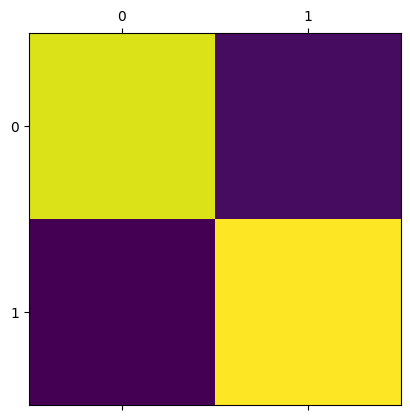

In [36]:
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()


In [39]:
np.mean(y_predicted == y_test) * 100

86.0